In [36]:
# https://habr.com/post/207160/
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
# https://machinelearningmastery.com/make-predictions-time-series-forecasting-python/
# https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
# https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/
# http://dacatay.com/data-science/part-4-time-series-prediction-arima-python/
# https://machinelearningmastery.com/time-series-forecast-uncertainty-using-confidence-intervals-python/

In [37]:
Exchange = ['binance','bitstamp','cex','exmousd','exmousdt','gdax','kucoin']

In [38]:
i =0
Exchange[i]

'binance'

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from itertools import product
from scipy.signal import medfilt
from sklearn.metrics import mean_squared_error
import plotly.offline as pl
import plotly.graph_objs as go
pl.init_notebook_mode(connected=True)

In [33]:
datafile = Exchange[i] + '_fracask.csv'
datafile

'binance_fracV_ask.csv'

In [34]:
series = pd.read_csv(datafile, squeeze=True, index_col=0, parse_dates=True)
series.index = pd.to_datetime(series.index, unit='s')
series.head()

,V,P,A,B,Err
Time,,,,,
2018-04-28 11:34:14.168903,620.754024,9261.770604,-1.010546,1.802502,31.988586


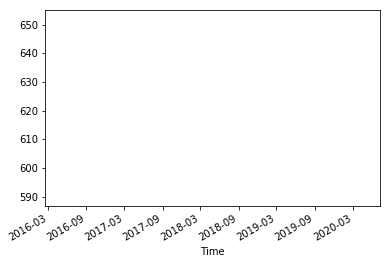

In [35]:
V = series['V']
V.plot()
pyplot.show()

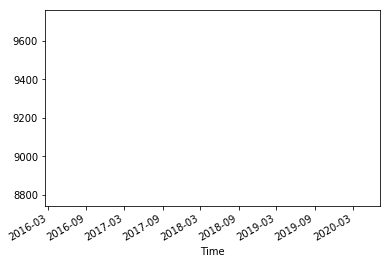

In [8]:
P = series['P']
P.plot()
pyplot.show()

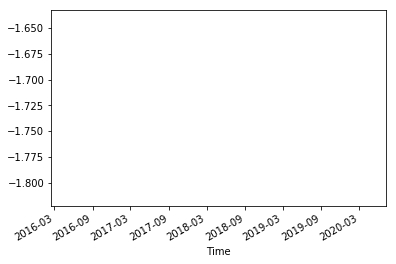

In [9]:
A = series['A']
A.plot()
pyplot.show()

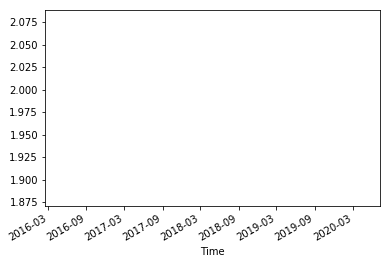

In [10]:
B = series['B']
B.plot()
pyplot.show()

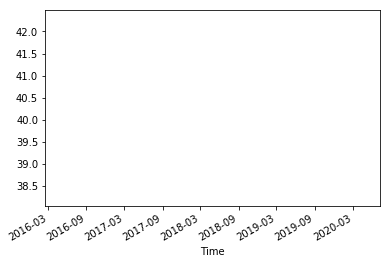

In [11]:
Err = series['Err']
Err.plot()
pyplot.show()

In [12]:
# Filter
#window = 3
#V = medfilt(V,window)
#P = medfilt(P,window)
#A = medfilt(A,window)
#B = medfilt(B,window)

In [13]:
#traceV= go.Scatter(
#            x = series.index,
#            y = V,
#            mode = 'lines+markers',
#            name = 'V'
#            )
#data = [traceV]
#pl.iplot(data, filename='scatter-mode')

In [14]:
#traceP= go.Scatter(
#            x = series.index,
#            y = P,
#            mode = 'lines+markers',
#            name = 'P'
#            )
#data = [traceP]
#pl.iplot(data, filename='scatter-mode')

In [15]:
#traceA= go.Scatter(
#            x = series.index,
#            y = A,
#            mode = 'lines+markers',
#            name = 'A'
#            )
#data = [traceA]
#pl.iplot(data, filename='scatter-mode')

In [16]:
#traceB= go.Scatter(
#            x = series.index,
#            y = B,
#            mode = 'lines+markers',
#            name = 'B'
#            )
#data = [traceB]
#pl.iplot(data, filename='scatter-mode')

In [17]:
#d = {'Time': series.index, 'V': V}
#V = pd.DataFrame(data=d)
#V.set_index('Time', inplace=True)
#V.head()
#itogV = V.describe()
#itogV

In [18]:
#d = {'Time': series.index, 'P': P}
#P = pd.DataFrame(data=d)
#P.set_index('Time', inplace=True)
#P.head()
#itogV = P.describe()
#itogV

In [19]:
#d = {'Time': series.index, 'A': A}
#A = pd.DataFrame(data=d)
#A.set_index('Time', inplace=True)
#A.head()
#itogV = A.describe()
#itogV

In [20]:
#d = {'Time': series.index, 'B': B}
#B = pd.DataFrame(data=d)
#B.set_index('Time', inplace=True)
#B.head()
#itogV = B.describe()
#itogV

TypeError: object of type 'numpy.float64' has no len()

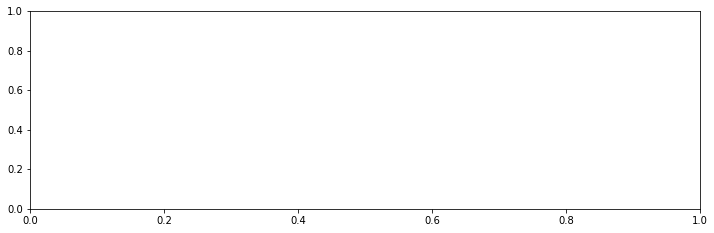

In [21]:
# ACF поможет нам определить q
# PACF поможет нам определить p
fig = pyplot.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(V.squeeze(), lags=10, ax=ax1) # V
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(V, lags=10, ax=ax2) # V

TypeError: object of type 'numpy.float64' has no len()

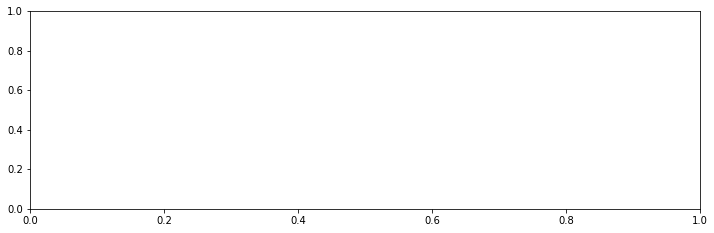

In [22]:
# ACF поможет нам определить q
# PACF поможет нам определить p
fig = pyplot.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(P.squeeze(), lags=10, ax=ax1) # P
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(P, lags=10, ax=ax2) # P

TypeError: object of type 'numpy.float64' has no len()

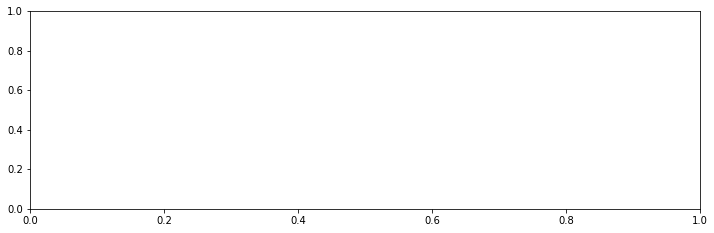

In [23]:
# ACF поможет нам определить q
# PACF поможет нам определить p
fig = pyplot.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(A.squeeze(), lags=10, ax=ax1) # A
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(A, lags=10, ax=ax2) # A

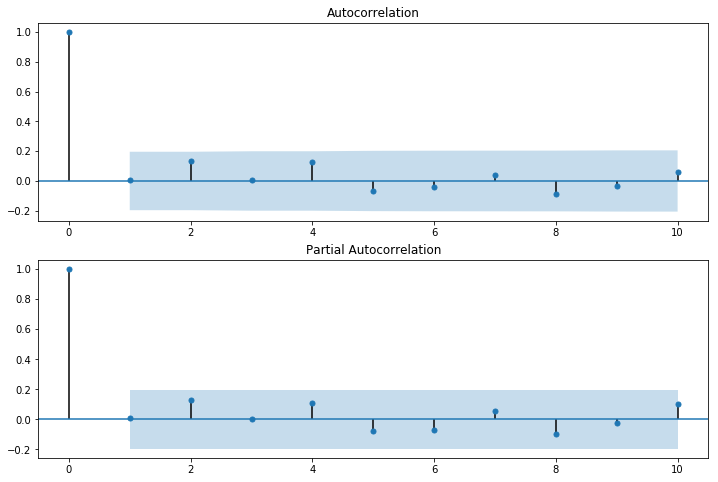

In [90]:
# ACF поможет нам определить q
# PACF поможет нам определить p
fig = pyplot.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(B.squeeze(), lags=10, ax=ax1) # B
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(B, lags=10, ax=ax2) # B

In [91]:
#autocorrelation_plot(P)
#pyplot.show()

In [92]:
# define the p, d and q parameters to take any value between 0 and 2
p = q = range(0,4)
d = range(2)
# generate all different combinations of p, d and q triplets
pdq = list(product(p, d, q))
#pdq

In [93]:
best_aic = np.inf
best_pdq = None
tmp_model = None
best_mdl = None

In [94]:
for param in pdq:
    try:
        tmp_mdl = ARIMA(P, order=param)
        res = tmp_mdl.fit()
        if res.aic < best_aic:
            best_aic = res.aic
            best_pdq = param
            best_mdl = tmp_mdl
        print("AIC",res.aic)
    except:
        print("Error")
        continue
print("Best ARIMA{} - AIC:{}".format(best_pdq, best_aic))

AIC 775.7496958705718
AIC 740.3333942287356
AIC 711.9757887456617


/Users/yevhen/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/Users/yevhen/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



AIC 709.2099425419967
AIC 696.3603552044907
AIC 676.8856646093298
AIC 677.1653605613394
AIC 679.0129752530133
AIC 696.0669888395103
AIC 685.3714269188449
AIC 684.8182141506447
AIC 686.8177969340484
AIC 675.0551960450514
AIC 676.7334778625492
AIC 677.8447978732161
Error
AIC 682.4390475483976
AIC 684.4327241790622
AIC 685.9858640024694
Error
AIC 676.8450274960989
AIC 677.3278952990006
AIC 679.7753886923726
AIC 681.6653476736597
AIC 684.4345595970165
AIC 685.9871658434481
AIC 687.8249785306411
Error
AIC 677.9117805662404
AIC 679.6562005822216
AIC 682.1274282386526
AIC 683.5254026246541
Best ARIMA(1, 1, 0) - AIC:675.0551960450514


/Users/yevhen/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



In [95]:
best_pdq

(1, 1, 0)

In [96]:
# fit model
model = ARIMA(P, order=best_pdq)
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.P   No. Observations:                   99
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -334.528
Method:                       css-mle   S.D. of innovations              7.092
Date:                Fri, 27 Apr 2018   AIC                            675.055
Time:                        16:27:13   BIC                            682.841
Sample:                    04-27-2018   HQIC                           678.205
                         - 04-27-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4191      0.490     -0.854      0.395      -1.380       0.542
ar.L1.D.P     -0.4578      0.089     -5.143      0.000      -0.632      -0.283
                                    Roots           

/Users/yevhen/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/Users/yevhen/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



/Users/yevhen/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



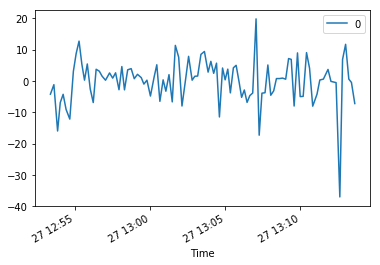

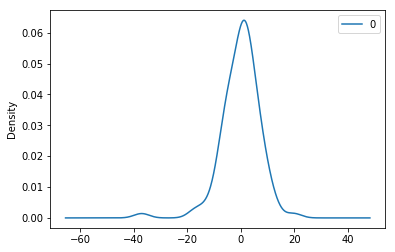

               0
count  99.000000
mean   -0.019591
std     7.130561
min   -37.067350
25%    -3.896538
50%     0.568266
75%     3.990123
max    19.816740


In [97]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(label='Произведение cos и sin')
pyplot.legend()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [100]:
X = P.values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

/Users/yevhen/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/Users/yevhen/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/Users/yevhen/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



predicted=9296.930469, expected=9297.250998
predicted=9296.941114, expected=9300.354144
predicted=9298.589214, expected=9298.170000
predicted=9298.861783, expected=9298.013750
predicted=9297.751891, expected=9260.407010
predicted=9277.115764, expected=9283.869969
predicted=9271.283815, expected=9284.207822
predicted=9283.516625, expected=9284.016768
predicted=9283.573297, expected=9283.008953
predicted=9282.934258, expected=9275.625591
Test MSE: 167.392


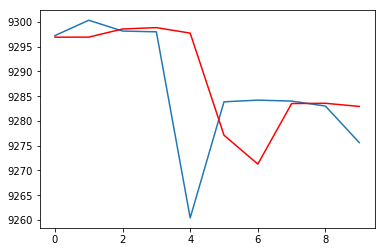

In [101]:
# Single-step forecast
for t in range(len(test)):
    model = ARIMA(history, order=best_pdq)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #history.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# Recursive Multi-step forecast